In [1]:
### APO Production MD testing ###

In [9]:

from SBLMDCOVDOCK import SBLSettings
from SBLMDCOVDOCK.md_setuptools import plot_xvg

settings = SBLSettings.GROMACS_Settings()

import pandas as pd
import os

import gmxapi as gmx
import subprocess
import matplotlib.pyplot as plt
#collect APO structures 

# AMPC - https://journals.asm.org/doi/10.1128/AAC.02073-20
ampc = "6T3D"
# KPC-2 - BLDB: http://dx.doi.org/10.1021/ACS.JMEDCHEM.7B00158
kpc2 = "5UL8"
# OXA-10 - BLDB: https://www.pnas.org/doi/full/10.1073/pnas.241442898
oxa10 = "1K55"

structures = pd.DataFrame({"PDBID": [ampc, kpc2, oxa10], 
                           "Name": ["AmpC", "KPC2", "OXA10"]})


settings.structures_output = os.path.join(settings.structures_output, 'amber14')
print(settings.structures_output)

amber14sb_ff_path = os.path.join(os.getcwd())

# Set the GMXLIB environment variable
os.environ["GMXLIB"] = amber14sb_ff_path

prod_structures/APO/amber14


In [10]:
#Perform free production md of the apo protein

for pdbcode in structures.PDBID:
    # pdbcode = structures.PDBID[1]
    print(pdbcode)
    # break
    md_mdp = os.path.join(settings.config, 'md.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.tpr")

    grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path, "-v"]
    subprocess.run(grompp_command, check=True)

    mdrun_command = ["gmx", "mdrun", "-v", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(mdrun_command, check=True)
    # break
    # grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path.replace(".tpr", "_nbcpu.tpr"), "-r", input_path]
    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","_nbcpu"), "-nb", "cpu"]
    # subprocess.run(mdrun_command, check=True)


    # grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path.replace(".tpr", "_nbgpu.tpr"), "-r", input_path]
    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","_nbgpu"), "-nb", "gpu"]
    # subprocess.run(mdrun_command, check=True)


    print("Done with " + pdbcode)

6T3D


                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/md.mdp -c prod_structures/APO/amber14/APO_6T3D_npt.gro -p prod_structures/APO/amber14/APO_6T3D.top -o prod_structures/APO/amber14/APO_6T3D_md.tpr -r prod_structures/APO/amber14/APO_6T3D_npt.gro -v

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5
renumbering atomtypes...
processing index file...
Making dummy/rest group for Acc. not used containing 79734 elements
Making dummy/rest group for Freeze containing 79734 elements
Making dummy/rest group for Energy Mon. containing 79734 elements
Making dummy/rest group for VCM containing 79734 elements
Number of degrees of freedom in T-Coupling group Protein is 13961.74
Number of degrees of freedom in T-Coupling group non-Protein is 148452.27
Making dummy/rest g

checking input for internal consistency...

Setting the LD random seed to -822084353

processing topology...

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

processing coordinates...

double-checking input for internal consistency...

converting bonded parameters...

initialising group options...
Analysing residue names:
There are:   358    Protein residues
There are: 24668      Water residues
There are:   149        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.423 nm between atom 5203 and 5211

Determining Verlet buffer for a tole

Changing nstlist from 10 to 100, rlist from 1 to 1.156

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 

starting mdrun 'Generic title in water'
500000 steps,   1000.0 ps.
step 5100: timed with pme grid 60 60 60, coulomb cutoff 1.000: 442.7 M-cycles
step 5300: timed with pme grid 52 52 52, coulomb cutoff 1.118: 383.6 M-cycles
step 5500: timed with pme grid 48 48 48, coulomb cutoff 1.211: 427.2 M-cycles
step 5700: timed with pme grid 44 44 44, coulomb cutoff 1.322: 939.3 M-cycles
step 5900: timed with pme grid 48 48 48, coulomb cutoff 1.211: 791.6 M-cycles
step 6100: timed with pme grid 52 52 52, coulomb cutoff 1.118: 383.0 M-cycles
step 6300: timed with pme grid 56 56 56, coulomb cutoff 1.038: 338.5 M-cycles
          

Done with 6T3D
5UL8


renumbering atomtypes...
processing index file...
Making dummy/rest group for Acc. not used containing 54993 elements
Making dummy/rest group for Freeze containing 54993 elements
Making dummy/rest group for Energy Mon. containing 54993 elements
Making dummy/rest group for VCM containing 54993 elements
Number of degrees of freedom in T-Coupling group Protein is 10093.73
Number of degrees of freedom in T-Coupling group non-Protein is 102018.27
Making dummy/rest group for User1 containing 54993 elements
Making dummy/rest group for User2 containing 54993 elements
Making dummy/rest group for Or. Res. Fit containing 54993 elements
Making dummy/rest group for QMMM containing 54993 elements
T-Coupling       has 2 element(s): Protein non-Protein
Energy Mon.      has 1 element(s): rest
Acc. not used    has 1 element(s): rest
Freeze           has 1 element(s): rest
User1            has 1 element(s): rest
User2            has 1 element(s): rest
VCM              has 1 element(s): rest
Compressed X 

checking input for internal consistency...

Setting the LD random seed to 2104999923

processing topology...

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

processing coordinates...

double-checking input for internal consistency...

converting bonded parameters...

initialising group options...
Analysing residue names:
There are:   271    Protein residues
There are: 16952      Water residues
There are:   103        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.428 nm between atom 22 and 30

Determining Verlet buffer for a toleranc

Changing nstlist from 10 to 100, rlist from 1 to 1.156

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 

starting mdrun 'Generic title in water'
500000 steps,   1000.0 ps.
step 7300: timed with pme grid 52 52 52, coulomb cutoff 1.000: 238.1 M-cycles
step 7500: timed with pme grid 44 44 44, coulomb cutoff 1.166: 291.2 M-cycles
step 7700: timed with pme grid 48 48 48, coulomb cutoff 1.068: 251.0 M-cycles
step 7900: timed with pme grid 52 52 52, coulomb cutoff 1.000: 235.5 M-cycles
              optimal pme grid 52 52 52, coulomb cutoff 1.000
step 499900, remaining wall clock time:     0 s          247000, remaining wall clock time:   175 s          
Writing final coordinates.
step 500000, remaining wall clock time:     0

Done with 5UL8
1K55


renumbering atomtypes...
processing index file...
Making dummy/rest group for Acc. not used containing 47125 elements
Making dummy/rest group for Freeze containing 47125 elements
Making dummy/rest group for Energy Mon. containing 47125 elements
Making dummy/rest group for VCM containing 47125 elements
Number of degrees of freedom in T-Coupling group Protein is 9678.70
Number of degrees of freedom in T-Coupling group non-Protein is 86595.30
Making dummy/rest group for User1 containing 47125 elements
Making dummy/rest group for User2 containing 47125 elements
Making dummy/rest group for Or. Res. Fit containing 47125 elements
Making dummy/rest group for QMMM containing 47125 elements
T-Coupling       has 2 element(s): Protein non-Protein
Energy Mon.      has 1 element(s): rest
Acc. not used    has 1 element(s): rest
Freeze           has 1 element(s): rest
User1            has 1 element(s): rest
User2            has 1 element(s): rest
VCM              has 1 element(s): rest
Compressed X   

checking input for internal consistency...

Setting the LD random seed to 1474260221

processing topology...

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

processing coordinates...

double-checking input for internal consistency...

converting bonded parameters...

initialising group options...
Analysing residue names:
There are:   245    Protein residues
There are: 14389      Water residues
There are:    88        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.426 nm between atom 3443 and 3451

Determining Verlet buffer for a tole

Changing nstlist from 10 to 100, rlist from 1 to 1.156

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 

starting mdrun 'Generic title in water'
500000 steps,   1000.0 ps.
step 8400: timed with pme grid 52 52 52, coulomb cutoff 1.000: 207.8 M-cycles
step 8600: timed with pme grid 44 44 44, coulomb cutoff 1.104: 238.3 M-cycles
step 8800: timed with pme grid 48 48 48, coulomb cutoff 1.012: 203.4 M-cycles
step 9000: timed with pme grid 52 52 52, coulomb cutoff 1.000: 206.0 M-cycles
              optimal pme grid 48 48 48, coulomb cutoff 1.012
step 499900, remaining wall clock time:   

Done with 1K55



GROMACS reminds you: "She Needs Cash to Buy Aspirine For Her Pain" (LIVE)



In [19]:
for pdbcode in structures.PDBID:
    
    md_mdp = os.path.join(settings.config, 'md.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    xtc_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.xtc")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.tpr")
    xtc_out = xtc_path.replace(".xtc", "_noPBC.xtc")

    trjconv_command = ['gmx', 'trjconv', 
                       '-f', xtc_path, 
                       '-s', tpr_path,  
                       "-o", xtc_out,
                        '-pbc', 'mol',
                        "-center"]
    
    subprocess.run(trjconv_command, input=b"1\n0\n", check=True)

    trjconv_command = ['gmx', 'trjconv', 
                       '-f', xtc_path, 
                       '-s', tpr_path,  
                       "-o", xtc_out.replace(".xtc", ".pdb"),
                        '-pbc', 'mol',
                        "-center"]
    
    subprocess.run(trjconv_command, input=b"1\n1\n", check=True)


                     :-) GROMACS - gmx trjconv, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx trjconv -f prod_structures/APO/amber14/APO_6T3D_md.xtc -s prod_structures/APO/amber14/APO_6T3D_md.tpr -o prod_structures/APO/amber14/APO_6T3D_md_noPBC.xtc -pbc mol -center

Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file prod_structures/APO/amber14/APO_6T3D_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_6T3D_md.tpr, VERSION 2023.2 (single precision)
Group     0 (         System) has 79734 elements
Group     1 (        Protein) has  5581 elements
Group     2 (      Protein-H) has  2800 elements
Group     3 (        C-alpha) has   358 elements
Group     4 (       Backbone) has  1074 elements
Group     5 (      MainChain) has  1433 elements
Group     6 (   MainChain+Cb) has  1762 elements
Group     7 (    MainChain+H) 

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for centering
Selected 1: 'Protein'
Select group for output
Selected 0: 'System'


Last frame        100 time 1000.000    ->  frame     99 time  990.000      
 ->  frame    100 time 1000.000      
Last written: frame    100 time 1000.000


GROMACS reminds you: "Bad As This Shit Is, This Shit Ain't As Bad As You Think It Is." (Jackie Brown)

                     :-) GROMACS - gmx trjconv, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx trjconv -f prod_structures/APO/amber14/APO_5UL8_md.xtc -s prod_structures/APO/amber14/APO_5UL8_md.tpr -o prod_structures/APO/amber14/APO_5UL8_md_noPBC.xtc -pbc mol -center

Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file prod_structures/APO/amber14/APO_5UL8_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_5UL8_md.tpr, VERSION 2023.2 (single precision)


Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for centering
Selected 1: 'Protein'
Select group for output
Selected 1: 'Protein'


Group     0 (         System) has 54993 elements
Group     1 (        Protein) has  4034 elements
Group     2 (      Protein-H) has  2026 elements
Group     3 (        C-alpha) has   271 elements
Group     4 (       Backbone) has   813 elements
Group     5 (      MainChain) has  1085 elements
Group     6 (   MainChain+Cb) has  1331 elements
Group     7 (    MainChain+H) has  1345 elements
Group     8 (      SideChain) has  2689 elements
Group     9 (    SideChain-H) has   941 elements
Group    10 (    Prot-Masses) has  4034 elements
Group    11 (    non-Protein) has 50959 elements
Group    12 (          Water) has 50856 elements
Group    13 (            SOL) has 50856 elements
Group    14 (      non-Water) has  4137 elements
Group    15 (            Ion) has   103 elements
Group    16 ( Water_and_ions) has 50959 elements
Select a group: Group     0 (         System) has 54993 elements
Group     1 (        Protein) has  4034 elements
Group     2 (      Protein-H) has  2026 elements
Grou

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for centering
Selected 1: 'Protein'
Select group for output
Selected 0: 'System'


Last frame        100 time 1000.000    ->  frame     99 time  990.000      
 ->  frame    100 time 1000.000      
Last written: frame    100 time 1000.000


GROMACS reminds you: "Miggida-Miggida-Miggida-Mac" (Kriss Kross)

                     :-) GROMACS - gmx trjconv, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx trjconv -f prod_structures/APO/amber14/APO_1K55_md.xtc -s prod_structures/APO/amber14/APO_1K55_md.tpr -o prod_structures/APO/amber14/APO_1K55_md_noPBC.xtc -pbc mol -center

Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file prod_structures/APO/amber14/APO_1K55_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_1K55_md.tpr, VERSION 2023.2 (single precision)
Group     0 (         System) has 47125 elements
Group     1 (        Protein) has  3870 elements
Group     2 (      Protein-H) has  1939 elements
Gro

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for centering
Selected 1: 'Protein'
Select group for output
Selected 1: 'Protein'


Last frame        100 time 1000.000    ->  frame     99 time  990.000      
 ->  frame    100 time 1000.000      
Last written: frame    100 time 1000.000


GROMACS reminds you: "Miggida-Miggida-Miggida-Mac" (Kriss Kross)

                     :-) GROMACS - gmx trjconv, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx trjconv -f prod_structures/APO/amber14/APO_1K55_md.xtc -s prod_structures/APO/amber14/APO_1K55_md.tpr -o prod_structures/APO/amber14/APO_1K55_md_noPBC.pdb -pbc mol -center

Will write pdb: Protein data bank file
Reading file prod_structures/APO/amber14/APO_1K55_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_1K55_md.tpr, VERSION 2023.2 (single precision)
Group     0 (         System) has 47125 elements
Group     1 (        Protein) has  3870 elements
Group     2 (      Protein-H) has  1939 elements
Group     3 (        C-alpha)

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for centering
Selected 1: 'Protein'
Select group for output
Selected 0: 'System'


Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for centering
Selected 1: 'Protein'
Select group for output
Selected 1: 'Protein'


Last frame        100 time 1000.000    ->  frame     99 time  990.000      
 ->  frame    100 time 1000.000      
Last written: frame    100 time 1000.000


GROMACS reminds you: "This really is a pretty scene, could you ask your kid to smile please?" (Joe Jackson)



                       :-) GROMACS - gmx rms, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx rms -s prod_structures/APO/amber14/APO_6T3D_md.tpr -f prod_structures/APO/amber14/APO_6T3D_md_noPBC.xtc -o prod_structures/APO/amber14/APO_6T3D_md_noPBC_rmsd.xvg -tu ns

Reading file prod_structures/APO/amber14/APO_6T3D_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_6T3D_md.tpr, VERSION 2023.2 (single precision)
Select group for least squares fit
Group     0 (         System) has 79734 elements
Group     1 (        Protein) has  5581 elements
Group     2 (      Protein-H) has  2800 elements
Group     3 (        C-alpha) has   358 elements
Group     4 (       Backbone) has  1074 elements
Group     5 (      MainChain) has  1433 elements
Group     6 (   MainChain+Cb) has  1762 elements
Group     7 (    MainChain+H) has  1767 elements
Group     8 (   

Selected 1: 'Protein'
Selected 1: 'Protein'


Last frame        100 time    1.000   

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_md_noPBC_rmsd.xvg to prod_structures/APO/amber14/#APO_6T3D_md_noPBC_rmsd.xvg.1#

GROMACS reminds you: "This really is a pretty scene, could you ask your kid to smile please?" (Joe Jackson)



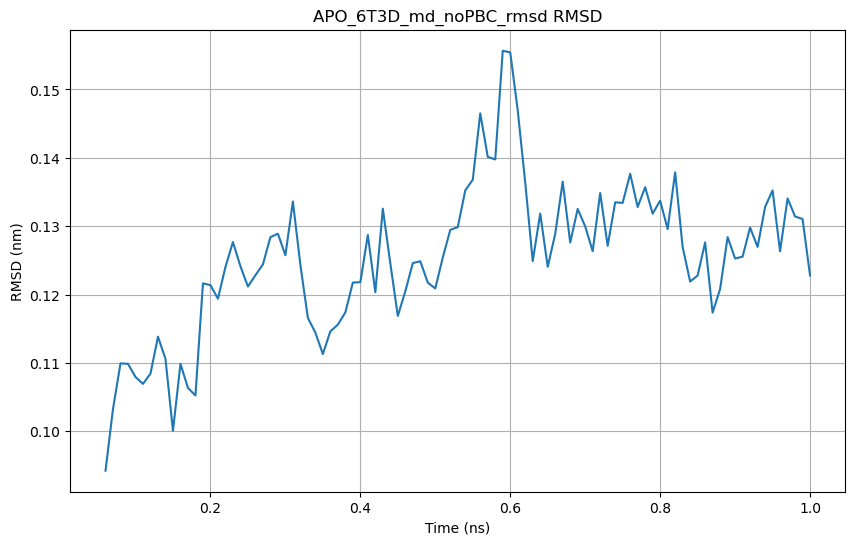

                       :-) GROMACS - gmx rms, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx rms -s prod_structures/APO/amber14/APO_5UL8_md.tpr -f prod_structures/APO/amber14/APO_5UL8_md_noPBC.xtc -o prod_structures/APO/amber14/APO_5UL8_md_noPBC_rmsd.xvg -tu ns

Reading file prod_structures/APO/amber14/APO_5UL8_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_5UL8_md.tpr, VERSION 2023.2 (single precision)
Select group for least squares fit
Group     0 (         System) has 54993 elements
Group     1 (        Protein) has  4034 elements
Group     2 (      Protein-H) has  2026 elements
Group     3 (        C-alpha) has   271 elements
Group     4 (       Backbone) has   813 elements
Group     5 (      MainChain) has  1085 elements
Group     6 (   MainChain+Cb) has  1331 elements
Group     7 (    MainChain+H) has  1345 elements
Group     8 (   

Selected 1: 'Protein'
Selected 1: 'Protein'


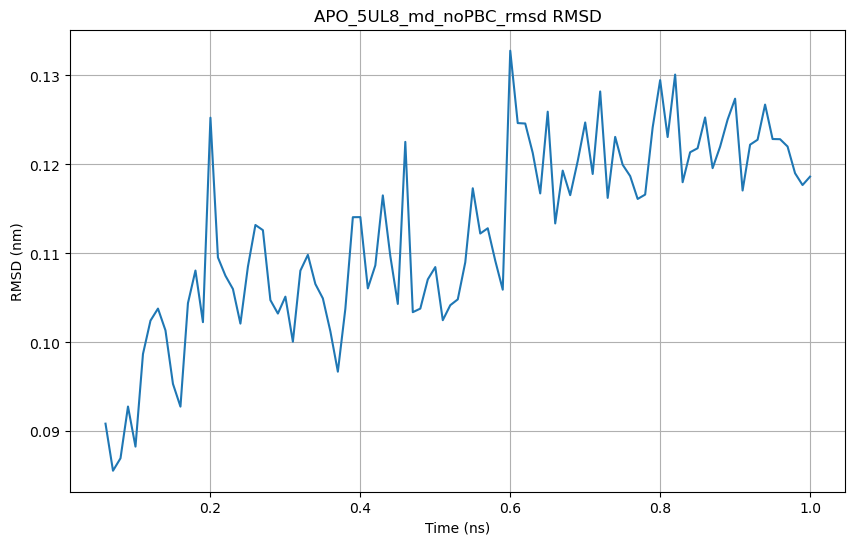

                       :-) GROMACS - gmx rms, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx rms -s prod_structures/APO/amber14/APO_1K55_md.tpr -f prod_structures/APO/amber14/APO_1K55_md_noPBC.xtc -o prod_structures/APO/amber14/APO_1K55_md_noPBC_rmsd.xvg -tu ns

Reading file prod_structures/APO/amber14/APO_1K55_md.tpr, VERSION 2023.2 (single precision)
Reading file prod_structures/APO/amber14/APO_1K55_md.tpr, VERSION 2023.2 (single precision)
Select group for least squares fit
Group     0 (         System) has 47125 elements
Group     1 (        Protein) has  3870 elements
Group     2 (      Protein-H) has  1939 elements
Group     3 (        C-alpha) has   245 elements
Group     4 (       Backbone) has   735 elements
Group     5 (      MainChain) has   981 elements
Group     6 (   MainChain+Cb) has  1209 elements
Group     7 (    MainChain+H) has  1220 elements
Group     8 (   

Selected 1: 'Protein'
Selected 1: 'Protein'


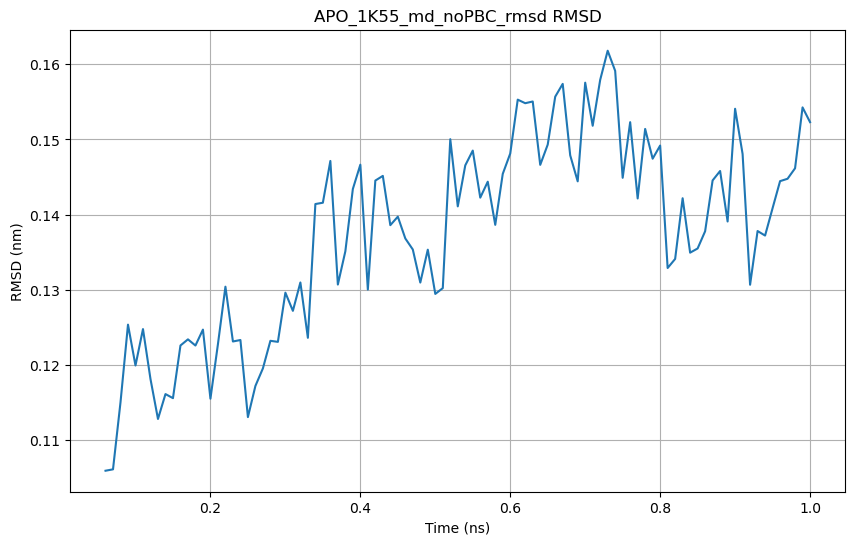

In [20]:
for pdbcode in structures.PDBID:
    
    md_mdp = os.path.join(settings.config, 'md.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    xtc_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.xtc")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.tpr")
    xtc_out = xtc_path.replace(".xtc", "_noPBC.xtc")

    gmx_rms_command = [
        "gmx", "rms", 
        "-s", tpr_path, 
        "-f", xtc_out, 
        "-o", xtc_out.replace(".xtc", "_rmsd.xvg"),
        "-tu", "ns"
    ]

    subprocess.run(gmx_rms_command, input=b"1\n1\n", check=True)

    plot_xvg(xtc_out.replace(".xtc", "_rmsd.xvg"))

In [ ]:
#Perform free production md of the apo protein

for pdbcode in structures.PDBID:
    # pdbcode = structures.PDBID[1]
    print(pdbcode)
    # break
    md_mdp = os.path.join(settings.config, 'md.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.tpr")

    grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path, "-v"]
    subprocess.run(grompp_command, check=True)

    mdrun_command = ["gmx", "mdrun", "-v", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(mdrun_command, check=True)
    # break
    # grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path.replace(".tpr", "_nbcpu.tpr"), "-r", input_path]
    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","_nbcpu"), "-nb", "cpu"]
    # subprocess.run(mdrun_command, check=True)


    # grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path.replace(".tpr", "_nbgpu.tpr"), "-r", input_path]
    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","_nbgpu"), "-nb", "gpu"]
    # subprocess.run(mdrun_command, check=True)


    print("Done with " + pdbcode)

In [ ]:
# #Perform free production md of the apo protein - testing for GPUs etc

# for pdbcode in structures.PDBID:
#     md_mdp = os.path.join(settings.config, 'md.mdp')
#     topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

#     input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.gro")
#     tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_md.tpr")

#     grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]
#     subprocess.run(grompp_command, check=True)

#     mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
#     subprocess.run(mdrun_command, check=True)

#     grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path.replace(".tpr", "_nbcpu.tpr"), "-r", input_path]
#     subprocess.run(grompp_command, check=True)

#     mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","_nbcpu"), "-nb", "cpu"]
#     subprocess.run(mdrun_command, check=True)


#     grompp_command = ["gmx", "grompp", "-f", md_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path.replace(".tpr", "_nbgpu.tpr"), "-r", input_path]
#     subprocess.run(grompp_command, check=True)

#     mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","_nbgpu"), "-nb", "gpu"]
#     subprocess.run(mdrun_command, check=True)


#     print("Done with " + pdbcode)